In [1]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
from sklearn.preprocessing import StandardScaler
import scipy as sp

In [2]:
train_data=pd.read_excel(r"B:\git_projects\rfm_customer\Online Retail.xlsx")
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
train_data.isna().sum(axis = 0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
train_data = train_data.dropna(subset=['CustomerID']).copy()
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
#removing the cancelled orders and adjusted orders

train_data = train_data[~train_data['InvoiceNo'].str.contains('C', na=False)].copy()
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
v = train_data[train_data['InvoiceNo'] == 'A563185']
v

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [7]:
#Column Quantity has a alot of negative values. Quantity of a product can not be negative; hence dropping those values

train_data = train_data[train_data['Quantity'] > 0].copy()
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#Column UnitPrice has negative values. Unit Price of a product can not be negative; hence dropping those values

train_data = train_data[train_data['UnitPrice'] > 0].copy()
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
train_data['Total_Amount'] = train_data['Quantity']*train_data['UnitPrice']
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Working on column 'Total Amount'


In [10]:
train_data.Total_Amount.max()

168469.6

In [11]:
print(train_data.Total_Amount.min())
print(train_data.Total_Amount.median())

0.001
11.8


In [12]:
Q1 = train_data.Total_Amount.quantile(0.25)
Q3 = train_data.Total_Amount.quantile(0.75)

IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

15.119999999999997
4.68
19.799999999999997


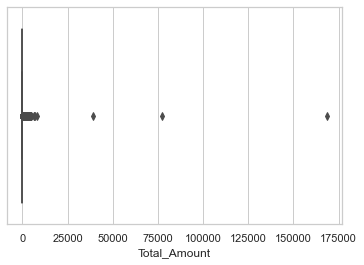

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_data["Total_Amount"])

In [14]:
#removing the outliers from the main dataset. We would analyse the outliers separately.
train_v1 = train_data[~((train_data['Total_Amount'] < (Q1 - 1.5*IQR)) | (train_data['Total_Amount'] > (Q3 + 1.5*IQR)))].copy()

# store outliers in a different dataframe
out_1 = train_data[((train_data['Total_Amount'] < (Q1 - 1.5*IQR)) | (train_data['Total_Amount'] > (Q3 + 1.5*IQR)))].copy()
train_v1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


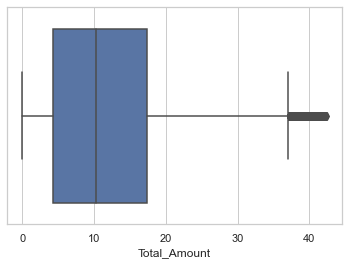

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_v1["Total_Amount"])

In [16]:
train_v1.Total_Amount.max()

42.45

c:\Users\Anubhav\anaconda3\envs\acii\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


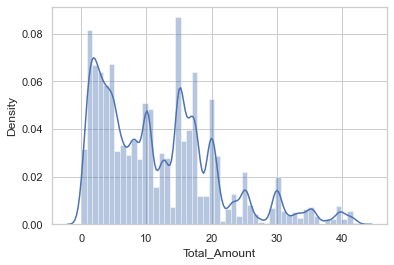

In [17]:
sns.set(style="whitegrid")
ax1 = sns.distplot(train_v1["Total_Amount"])

0.9293471740888029


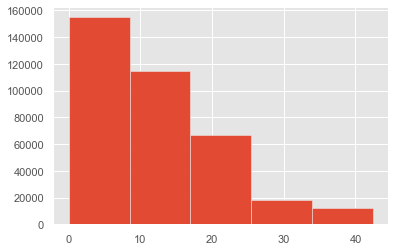

In [18]:
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt

plt.style.use('ggplot')

np.var(train_v1['Total_Amount'])

plt.hist(train_v1['Total_Amount'], bins=5)
print(skew(train_v1['Total_Amount']))

In [19]:
train_v1['Inv_time'] = pd.DatetimeIndex(train_v1['InvoiceDate']).time.copy()
train_v1['Inv_date'] = pd.DatetimeIndex(train_v1['InvoiceDate']).date.copy()
train_v1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Inv_time,Inv_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08:26:00,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08:26:00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12:50:00,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12:50:00,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12:50:00,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12:50:00,2011-12-09


In [20]:
train_v1.Inv_date.max()

datetime.date(2011, 12, 9)

In [21]:
import datetime as dt

train_v1['Recent'] = dt.date(2011, 12, 10) - train_v1['Inv_date']

In [22]:
v1 = train_v1[train_v1['CustomerID'] == int(18283.0)] #counter checking logic
v1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Inv_time,Inv_date,Recent
46026,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,2011-01-06 14:14:00,0.85,18283.0,United Kingdom,0.85,14:14:00,2011-01-06,338 days
46027,540350,20726,LUNCH BAG WOODLAND,1,2011-01-06 14:14:00,1.65,18283.0,United Kingdom,1.65,14:14:00,2011-01-06,338 days
46028,540350,22384,LUNCH BAG PINK POLKADOT,1,2011-01-06 14:14:00,1.65,18283.0,United Kingdom,1.65,14:14:00,2011-01-06,338 days
46029,540350,22386,JUMBO BAG PINK POLKADOT,1,2011-01-06 14:14:00,1.95,18283.0,United Kingdom,1.95,14:14:00,2011-01-06,338 days
46030,540350,20717,STRAWBERRY SHOPPER BAG,1,2011-01-06 14:14:00,1.25,18283.0,United Kingdom,1.25,14:14:00,2011-01-06,338 days
...,...,...,...,...,...,...,...,...,...,...,...,...
530499,580872,22385,JUMBO BAG SPACEBOY DESIGN,3,2011-12-06 12:02:00,2.08,18283.0,United Kingdom,6.24,12:02:00,2011-12-06,4 days
530500,580872,23202,JUMBO BAG VINTAGE LEAF,3,2011-12-06 12:02:00,2.08,18283.0,United Kingdom,6.24,12:02:00,2011-12-06,4 days
530501,580872,85099F,JUMBO BAG STRAWBERRY,3,2011-12-06 12:02:00,2.08,18283.0,United Kingdom,6.24,12:02:00,2011-12-06,4 days
530502,580872,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-12-06 12:02:00,2.08,18283.0,United Kingdom,20.80,12:02:00,2011-12-06,4 days


In [23]:
#train_v1['Recent_mnth'] = train_v1['Recent']/30
#train_v1

train_v1['Recent'] = train_v1['Recent'].astype('timedelta64[D]').copy()

#train_v1['Recent'] = train_v1['Recent']/ np.timedelta64(1, 'D')

In [24]:
rfm_Table = train_v1.groupby('CustomerID').agg({'Recent': lambda x:x.min(), # Recency
                                        'InvoiceNo': lambda x: len(x.unique()), # Frequency
                                        'Total_Amount': lambda x: x.sum()}) # Monetary Value

In [25]:
rfm_Table

,Recent,InvoiceNo,Total_Amount
CustomerID,,,
12347.0,3.0,7,3174.62
12348.0,76.0,4,601.64
12349.0,19.0,1,1145.35
12350.0,311.0,1,334.40
12352.0,37.0,7,1505.74
...,...,...,...
18280.0,278.0,1,180.60
18281.0,181.0,1,80.82
18282.0,8.0,2,178.05


In [26]:
rfm_Table.Recent.describe()

count    4194.000000
mean       93.088460
std        99.722403
min         1.000000
25%        18.000000
50%        51.500000
75%       144.000000
max       374.000000
Name: Recent, dtype: float64

In [27]:
rfm_Table.columns=['recency', 'frequency', 'monetary']

In [28]:
rfm_Table['recency'] = np.log10(rfm_Table['recency'])
rfm_Table['frequency'] = np.log10(rfm_Table['frequency'])
rfm_Table['monetary'] = np.log10(rfm_Table['monetary'])

In [29]:
rfm_Table

,recency,frequency,monetary
CustomerID,,,
12347.0,0.477121,0.845098,3.501692
12348.0,1.880814,0.602060,2.779337
12349.0,1.278754,0.000000,3.058938
12350.0,2.492760,0.000000,2.524266
12352.0,1.568202,0.845098,3.177750
...,...,...,...
18280.0,2.444045,0.000000,2.256718
18281.0,2.257679,0.000000,1.907519
18282.0,0.903090,0.301030,2.250542


In [30]:
from sklearn.preprocessing import StandardScaler
import scipy as sp
standard = ['recency', 'frequency', 'monetary']
rfm_Table[standard] = StandardScaler().fit_transform(rfm_Table[standard])
rfm_Table

,recency,frequency,monetary
CustomerID,,,
12347.0,-1.971924,1.178055,1.498724
12348.0,0.379855,0.539931,0.143877
12349.0,-0.628850,-1.040843,0.668297
12350.0,1.405125,-1.040843,-0.334532
12352.0,-0.143902,1.178055,0.891140
...,...,...,...
18280.0,1.323506,-1.040843,-0.836345
18281.0,1.011263,-1.040843,-1.491302
18282.0,-1.258246,-0.250456,-0.847928


In [31]:
rfm_Table['rec_quart'] = pd.qcut(rfm_Table['recency'], 5, ['5','4','3','2','1'])
#rfm_Table['fre_quart'] = pd.qcut(rfm_Table['frequency'], 5, ['1','2','3','4','5']) ## this does not work!
rfm_Table['fre_quart'] = pd.cut(rfm_Table['frequency'], 5, labels=['1','2','3','4','5'])
rfm_Table['mon_quart'] = pd.qcut(rfm_Table['monetary'], 5, ['1','2','3','4','5'])
rfm_Table

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart
CustomerID,,,,,,
12347.0,-1.971924,1.178055,1.498724,5,2,5
12348.0,0.379855,0.539931,0.143877,2,2,3
12349.0,-0.628850,-1.040843,0.668297,4,1,4
12350.0,1.405125,-1.040843,-0.334532,1,1,2
12352.0,-0.143902,1.178055,0.891140,3,2,5
...,...,...,...,...,...,...
18280.0,1.323506,-1.040843,-0.836345,1,1,2
18281.0,1.011263,-1.040843,-1.491302,1,1,1
18282.0,-1.258246,-0.250456,-0.847928,5,1,1


In [32]:
rfm_Table['frequency'].describe() #Because of this!!

count    4.194000e+03
mean     2.132295e-17
std      1.000119e+00
min     -1.040843e+00
25%     -1.040843e+00
50%     -2.504558e-01
75%      5.399314e-01
max      5.006451e+00
Name: frequency, dtype: float64

In [33]:
rfm_Table['fre_quart'].value_counts()

1    2311
2    1475
3     358
4      43
5       7
Name: fre_quart, dtype: int64

In [34]:
rfm_Table['fre_quart'].dtype

CategoricalDtype(categories=['1', '2', '3', '4', '5'], ordered=True)

In [35]:
rfm_Table['rec_quart'] = rfm_Table['rec_quart'].astype('int')
rfm_Table['fre_quart'] = rfm_Table['fre_quart'].astype('int')
rfm_Table['mon_quart'] = rfm_Table['mon_quart'].astype('int')
rfm_Table

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart
CustomerID,,,,,,
12347.0,-1.971924,1.178055,1.498724,5,2,5
12348.0,0.379855,0.539931,0.143877,2,2,3
12349.0,-0.628850,-1.040843,0.668297,4,1,4
12350.0,1.405125,-1.040843,-0.334532,1,1,2
12352.0,-0.143902,1.178055,0.891140,3,2,5
...,...,...,...,...,...,...
18280.0,1.323506,-1.040843,-0.836345,1,1,2
18281.0,1.011263,-1.040843,-1.491302,1,1,1
18282.0,-1.258246,-0.250456,-0.847928,5,1,1


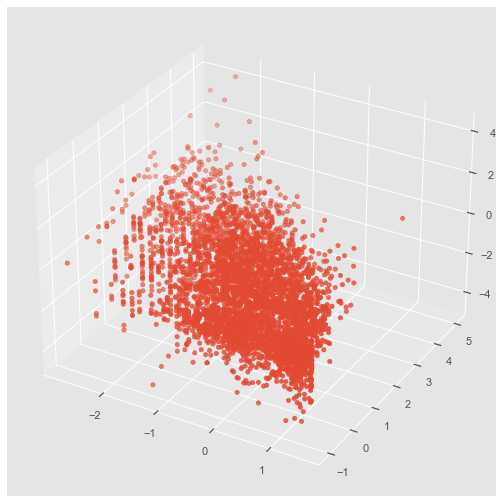

In [36]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_Table['recency'], rfm_Table['frequency'], rfm_Table['monetary'])

plt.show()

In [37]:
col_nam = ['recency', 'frequency', 'monetary']

In [38]:
rfm_Table[col_nam]

,recency,frequency,monetary
CustomerID,,,
12347.0,-1.971924,1.178055,1.498724
12348.0,0.379855,0.539931,0.143877
12349.0,-0.628850,-1.040843,0.668297
12350.0,1.405125,-1.040843,-0.334532
12352.0,-0.143902,1.178055,0.891140
...,...,...,...
18280.0,1.323506,-1.040843,-0.836345
18281.0,1.011263,-1.040843,-1.491302
18282.0,-1.258246,-0.250456,-0.847928


In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters = 4)

kmeans = kmeans.fit(rfm_Table[col_nam])

labels = kmeans.predict(rfm_Table[col_nam])

centeroids = kmeans.cluster_centers_

print(centeroids)

[[ 0.90929905 -0.88219135 -0.86778351]
 [-1.21632245  1.45155494  1.23822043]
 [ 0.2251278   0.34784142  0.46384776]
 [-0.75057927 -0.44918776 -0.4269696 ]]


C:\Users\Anubhav\AppData\Local\Temp/ipykernel_16600/4274221784.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


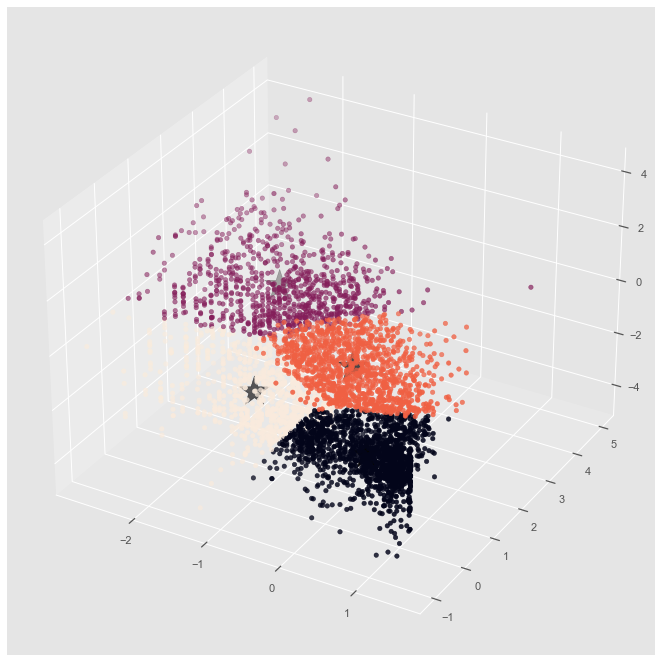

In [41]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(rfm_Table['recency'], rfm_Table['frequency'], rfm_Table['monetary'], c=labels)
ax.scatter(centeroids[:, 0], centeroids[:, 1], centeroids[:, 2], marker = '*', c='#070506', s=1000)

In [42]:
rfm_Table['Clusters'] = labels
rfm_Table

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12347.0,-1.971924,1.178055,1.498724,5,2,5,1
12348.0,0.379855,0.539931,0.143877,2,2,3,2
12349.0,-0.628850,-1.040843,0.668297,4,1,4,3
12350.0,1.405125,-1.040843,-0.334532,1,1,2,0
12352.0,-0.143902,1.178055,0.891140,3,2,5,2
...,...,...,...,...,...,...,...
18280.0,1.323506,-1.040843,-0.836345,1,1,2,0
18281.0,1.011263,-1.040843,-1.491302,1,1,1,0
18282.0,-1.258246,-0.250456,-0.847928,5,1,1,3


### Show the distribution of the customers within each cluster (Ratio & Percentage of customers per cluster divided by the total number of customers)


In [43]:
delta = rfm_Table.Clusters.value_counts()
counts = pd.DataFrame({'Clusters': delta.index, 'Tot_Count': delta})

counts['ratio_clusters'] = ((counts['Tot_Count'])/(counts.Tot_Count.sum()))
counts['percentage_clusters'] = counts['ratio_clusters']*100
counts

,Clusters,Tot_Count,ratio_clusters,percentage_clusters
0,0,1430,0.340963,34.096328
2,2,1188,0.283262,28.326180
1,1,817,0.194802,19.480210
3,3,759,0.180973,18.097282


In [44]:
print("the ratio of customers per cluster:\n",counts.ratio_clusters)
print("the percentage of customers per cluster:\n",counts.ratio_clusters)

the ratio of customers per cluster:
 0    0.340963
2    0.283262
1    0.194802
3    0.180973
Name: ratio_clusters, dtype: float64
the percentage of customers per cluster:
 0    0.340963
2    0.283262
1    0.194802
3    0.180973
Name: ratio_clusters, dtype: float64


### Show the statistics of each cluster (Min, Max, Median of clustering RFM attributes)

In [45]:
cluster_0 = rfm_Table[rfm_Table['Clusters'] == int(0)].copy()

cluster_0

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12350.0,1.405125,-1.040843,-0.334532,1,1,2,0
12353.0,1.101862,-1.040843,-1.412768,1,1,1,0
12354.0,1.195019,-1.040843,0.533982,1,1,4,0
12355.0,1.136518,-1.040843,-0.525852,1,1,2,0
12361.0,1.349220,-1.040843,-0.795444,1,1,2,0
...,...,...,...,...,...,...,...
18269.0,1.525597,-1.040843,-0.892351,1,1,1,0
18277.0,0.195623,-1.040843,-1.237399,3,1,1,0
18278.0,0.360450,-1.040843,-0.867139,2,1,1,0


In [46]:
cluster_1 = rfm_Table[rfm_Table['Clusters'] == int(1)].copy()

cluster_1

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12347.0,-1.971924,1.178055,1.498724,5,2,5,1
12362.0,-1.762598,1.584767,1.800913,5,3,5,1
12364.0,-1.258246,0.539931,0.708502,5,2,4,1
12381.0,-1.600233,0.794379,0.864510,5,2,4,1
12388.0,-0.753893,1.002278,1.028510,4,2,5,1
...,...,...,...,...,...,...,...
18241.0,-1.095881,2.189836,1.127920,5,3,5,1
18245.0,-1.258246,1.178055,1.325690,5,2,5,1
18257.0,-0.087175,1.330319,1.187362,3,2,5,1


In [47]:
cluster_2 = rfm_Table[rfm_Table['Clusters'] == int(2)].copy()

cluster_2

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12348.0,0.379855,0.539931,0.143877,2,2,3,2
12352.0,-0.143902,1.178055,0.891140,3,2,5,2
12356.0,-0.489833,0.211891,0.277545,4,2,4,2
12357.0,-0.205428,-1.040843,0.923660,3,1,5,2
12359.0,0.183184,0.539931,1.746278,3,2,5,2
...,...,...,...,...,...,...,...
18252.0,0.089599,-0.250456,0.035471,3,1,3,2
18260.0,0.978371,1.002278,1.248730,2,2,5,2
18263.0,-0.400625,0.211891,0.715149,4,2,4,2


In [48]:
cluster_3 = rfm_Table[rfm_Table['Clusters'] == int(3)].copy()

cluster_3

,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12349.0,-0.628850,-1.040843,0.668297,4,1,4,3
12358.0,-2.266951,-0.250456,-1.028435,5,1,1,3
12367.0,-1.600233,-1.040843,-0.890903,5,1,1,3
12374.0,-0.400625,-1.040843,0.101172,4,1,3,3
12375.0,-1.026530,-0.250456,-0.198662,5,1,3,3
...,...,...,...,...,...,...,...
18261.0,-0.017825,-0.250456,-0.359664,3,1,2,3
18270.0,-0.105597,-0.250456,-0.639566,3,1,2,3
18274.0,-0.272642,-1.040843,-0.857732,4,1,1,3


In [49]:
cluster_0.describe()


,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.0
mean,0.909299,-0.882191,-0.867784,1.660140,1.019580,1.720979,0.0
std,0.469929,0.338979,0.691239,0.766162,0.138602,0.798735,0.0
min,-0.522178,-1.040843,-4.201766,1.000000,1.000000,1.000000,0.0
25%,0.478212,-1.040843,-1.222030,1.000000,1.000000,1.000000,0.0
50%,1.031091,-1.040843,-0.797441,1.000000,1.000000,2.000000,0.0
75%,1.299560,-1.040843,-0.390468,2.000000,1.000000,2.000000,0.0
max,1.539345,1.002278,0.744629,4.000000,2.000000,4.000000,0.0


In [50]:
cluster_1.describe()


,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.0
mean,-1.218718,1.453498,1.240241,4.626683,2.544676,4.713586,1.0
std,0.702464,0.690613,0.571368,0.605468,0.636530,0.520392,0.0
min,-2.771304,0.211891,-0.376775,1.000000,2.000000,2.000000,1.0
25%,-1.762598,1.002278,0.858924,4.000000,2.000000,4.000000,1.0
50%,-1.172544,1.330319,1.212926,5.000000,2.000000,5.000000,1.0
75%,-0.668191,1.883937,1.611421,5.000000,3.000000,5.000000,1.0
max,1.537397,5.006451,4.218563,5.000000,5.000000,5.000000,1.0


In [51]:
cluster_2.describe()


,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.0
mean,0.223135,0.349292,0.464414,2.759259,1.765152,3.801347,2.0
std,0.520716,0.493125,0.456419,0.922958,0.462109,0.796537,0.0
min,-0.963218,-1.040843,-0.730422,1.000000,1.000000,2.000000,2.0
25%,-0.205428,-0.250456,0.136721,2.000000,1.000000,3.000000,2.0
50%,0.213866,0.211891,0.439319,3.000000,2.000000,4.000000,2.0
75%,0.586783,0.539931,0.794903,3.000000,2.000000,4.000000,2.0
max,1.501408,1.883937,1.837758,5.000000,3.000000,5.000000,2.0


In [52]:
cluster_3.describe()


,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.0
mean,-0.750579,-0.449188,-0.426970,4.208169,1.196311,2.310935,3.0
std,0.598312,0.532485,0.596139,0.729251,0.397468,0.920751,0.0
min,-2.771304,-1.040843,-4.546209,3.000000,1.000000,1.000000,3.0
25%,-1.095881,-1.040843,-0.772708,4.000000,1.000000,2.000000,3.0
50%,-0.628850,-0.250456,-0.354655,4.000000,1.000000,2.000000,3.0
75%,-0.296500,-0.250456,-0.034807,5.000000,1.000000,3.000000,3.0
max,0.231711,1.178055,1.102864,5.000000,2.000000,5.000000,3.0


### Describe the distinct features of each cluster. For example, a cluster identifies the least or most profitable customer group, the loyal (most frequent) group, old customers with no recent purchases (low recency, high frequency and medium monetary), or potential highly profitable customers (recent and medium monetary).

In [53]:
rfm_Table


,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12347.0,-1.971924,1.178055,1.498724,5,2,5,1
12348.0,0.379855,0.539931,0.143877,2,2,3,2
12349.0,-0.628850,-1.040843,0.668297,4,1,4,3
12350.0,1.405125,-1.040843,-0.334532,1,1,2,0
12352.0,-0.143902,1.178055,0.891140,3,2,5,2
...,...,...,...,...,...,...,...
18280.0,1.323506,-1.040843,-0.836345,1,1,2,0
18281.0,1.011263,-1.040843,-1.491302,1,1,1,0
18282.0,-1.258246,-0.250456,-0.847928,5,1,1,3


In [54]:
cluster_0


,recency,frequency,monetary,rec_quart,fre_quart,mon_quart,Clusters
CustomerID,,,,,,,
12350.0,1.405125,-1.040843,-0.334532,1,1,2,0
12353.0,1.101862,-1.040843,-1.412768,1,1,1,0
12354.0,1.195019,-1.040843,0.533982,1,1,4,0
12355.0,1.136518,-1.040843,-0.525852,1,1,2,0
12361.0,1.349220,-1.040843,-0.795444,1,1,2,0
...,...,...,...,...,...,...,...
18269.0,1.525597,-1.040843,-0.892351,1,1,1,0
18277.0,0.195623,-1.040843,-1.237399,3,1,1,0
18278.0,0.360450,-1.040843,-0.867139,2,1,1,0
